<a href="https://colab.research.google.com/github/szm5417/szm5417/blob/main/2348551_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [67]:
data = pd.read_csv('/content/employee_data (1) 2.csv')

In [68]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [69]:
data = data.drop('recently_promoted', axis=1)
data = data.drop('filed_complaint', axis=1)

In [70]:
data.shape

(14249, 8)

In [71]:
data.isnull().sum()

avg_monthly_hrs       0
department          709
last_evaluation    1532
n_projects            0
salary                0
satisfaction        181
status                0
tenure              181
dtype: int64

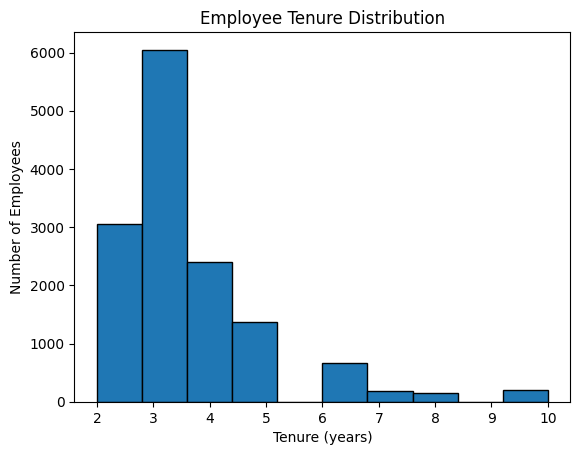

In [72]:
plt.hist(data['tenure'], edgecolor='k')

plt.xlabel('Tenure (years)')
plt.ylabel('Number of Employees')
plt.title('Employee Tenure Distribution')

# Show the histogram
plt.show()

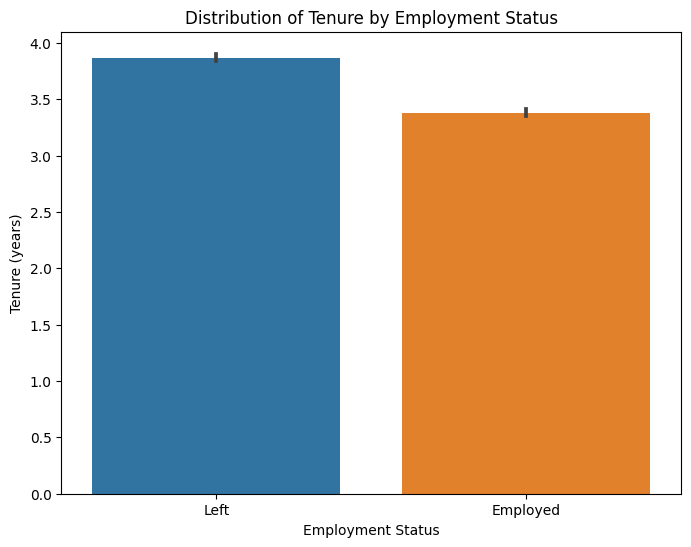

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(x='status', y='tenure', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Tenure (years)')
plt.title('Distribution of Tenure by Employment Status')
plt.show()

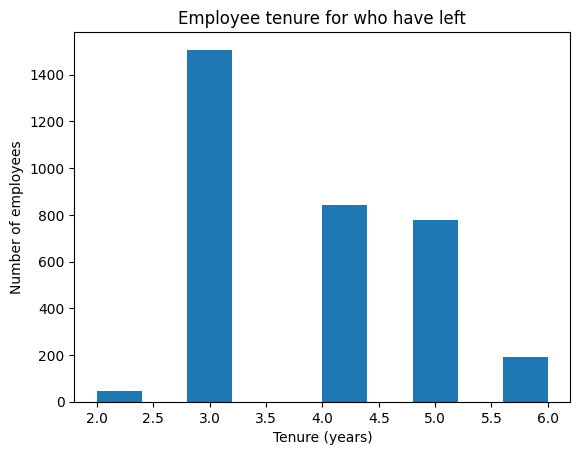

In [74]:
df_left = data[data['status'] == 'Left']
plt.hist(df_left['tenure'])
plt.xlabel('Tenure (years)')
plt.ylabel('Number of employees')
plt.title('Employee tenure for who have left')
plt.show()

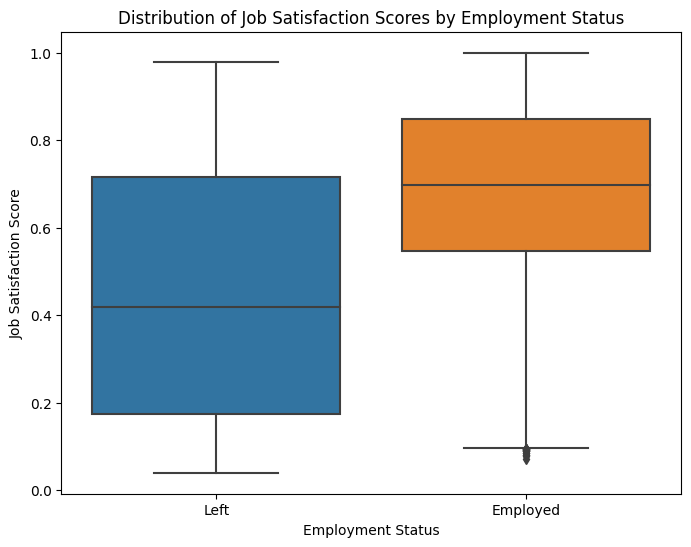

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='satisfaction', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')
plt.title('Distribution of Job Satisfaction Scores by Employment Status')
plt.show()

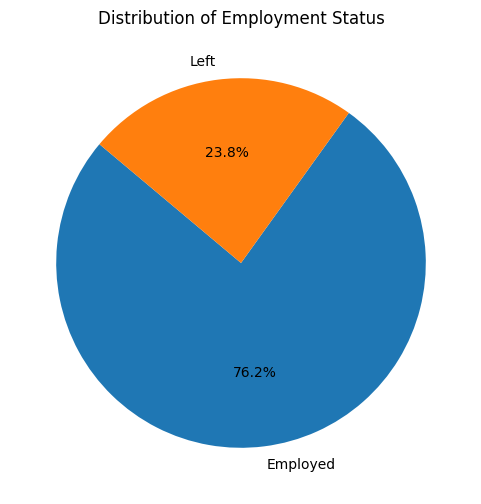

In [76]:
status_counts = data['status'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employment Status')
plt.show()

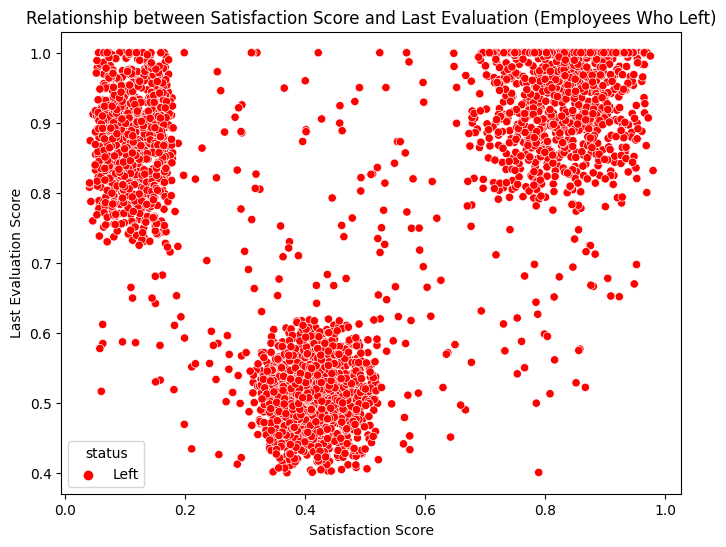

In [77]:
left_df = data[data['status'] == 'Left']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left_df, hue='status', palette={'Left': 'red', 'Employed': 'blue'})
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Relationship between Satisfaction Score and Last Evaluation (Employees Who Left)')
plt.show()

In [78]:
for col in ['tenure', 'satisfaction']:
  data[col].fillna(data[col].mode()[0], inplace = True)

In [79]:
data.isnull().sum()

avg_monthly_hrs       0
department          709
last_evaluation    1532
n_projects            0
salary                0
satisfaction          0
status                0
tenure                0
dtype: int64

In [80]:
data["status"] = data["status"].map({"Left": 0, "Employed": 1})

In [81]:
X = data[["tenure", "satisfaction", "n_projects"]] # Features
y = data["status"] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [83]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree classifier is:', round(accuracy, 2))

Accuracy of decision tree classifier is: 0.91


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
clf_gini = DecisionTreeClassifier(criterion="gini")
# Train the classifier on the training set
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model performance using accuracy score
accu_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy of the decision tree classifier with Gini impurity is: ", round(accu_gini,2))

# Build a decision tree classifier with entropy as the split criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train)

# Predict the labels of the testing set using entropy
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model performance using accuracy score
accu_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"The accuracy of the decision tree classifier with entropy is: ", round(accu_entropy, 2))

Accuracy of the decision tree classifier with Gini impurity is:  0.94
The accuracy of the decision tree classifier with entropy is:  0.93


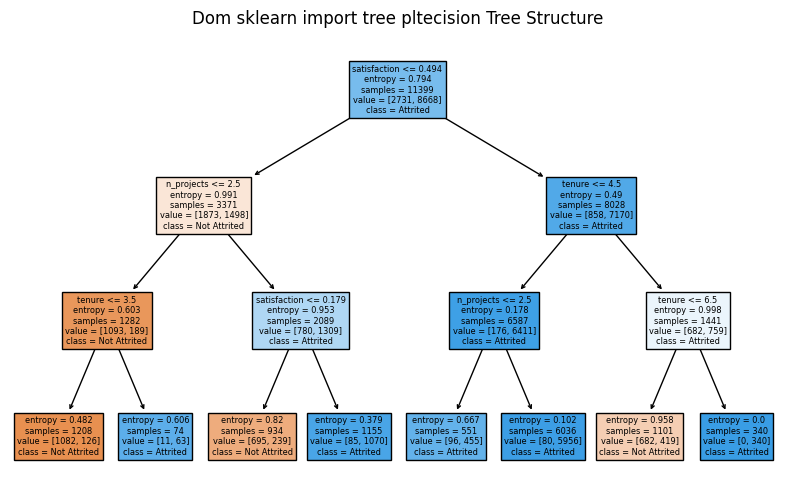

In [86]:
tf = plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=["Not Attrited", "Attrited"], filled=True)
plt.title("Dom sklearn import tree pltecision Tree Structure")
plt.show()

In [87]:
depth = clf.get_depth()
print(f"The depth of the decision tree is: {depth}")

The depth of the decision tree is: 3


In [88]:
feature_importances = clf.feature_importances_
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))
print("Feature importances:")
for feature, importance in sorted_importance_dict.items():
    print(f"{feature}: {importance:.3f}")

Feature importances:
satisfaction: 0.494
tenure: 0.358
n_projects: 0.148


In [89]:
min_leaf_sizes = [1, 5, 10, 20]  # Different minimum leaf sizes to experiment with

for min_leaf in min_leaf_sizes:
    print(f"\nDecision Tree with Minimum Leaf Size = {min_leaf}")
    clf_min_leaf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=min_leaf)
    clf_min_leaf.fit(X_train, y_train)


Decision Tree with Minimum Leaf Size = 1

Decision Tree with Minimum Leaf Size = 5

Decision Tree with Minimum Leaf Size = 10

Decision Tree with Minimum Leaf Size = 20


In [90]:

    # Predict the labels of the testing set
    y_pred_min_leaf = clf_min_leaf.predict(X_test)
# Evaluate the model performance using accuracy score
    acc_min_leaf = accuracy_score(y_test, y_pred_min_leaf)
    print(f"The accuracy of the decision tree with min_samples_leaf={min_leaf} is {acc_min_leaf:.2f}")


The accuracy of the decision tree with min_samples_leaf=20 is 0.96


In [91]:
max_depths = [3, 5, 7, 10]  # Different maximum depths to experiment with

for depth in max_depths:
    print(f"\nDecision Tree with Maximum Depth = {depth}")
    clf_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth.fit(X_train, y_train)


Decision Tree with Maximum Depth = 3

Decision Tree with Maximum Depth = 5

Decision Tree with Maximum Depth = 7

Decision Tree with Maximum Depth = 10


In [92]:

    y_pred_max_depth = clf_max_depth.predict(X_test)

    # Evaluate the model performance using accuracy score
    acc_max_depth = accuracy_score(y_test, y_pred_max_depth)
    print(f"The accuracy of the decision tree with max_depth={depth} is {acc_max_depth:.2f}")

The accuracy of the decision tree with max_depth=10 is 0.96


In [93]:
# Pruning using maximum depth and evaluate metrics for Entropy
print("Evaluation of Decision Tree with Entropy:")

for depth in max_depths:
    clf_max_depth_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth_entropy.fit(X_train, y_train)

    y_pred_max_depth_entropy = clf_max_depth_entropy.predict(X_test)

    acc_max_depth_entropy = accuracy_score(y_test, y_pred_max_depth_entropy)
    precision_max_depth_entropy = precision_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    recall_max_depth_entropy = recall_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    f1_max_depth_entropy = f1_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'

    print(f"Metrics for max_depth={depth}:")
    print(f"  Accuracy: {acc_max_depth_entropy:.2f}")
    print(f"  Precision: {precision_max_depth_entropy:.2f}")
    print(f"  Recall: {recall_max_depth_entropy:.2f}")
    print(f"  F1 Score: {f1_max_depth_entropy:.2f}")
    print()

Evaluation of Decision Tree with Entropy:
Metrics for max_depth=3:
  Accuracy: 0.91
  Precision: 0.97
  Recall: 0.91
  F1 Score: 0.94

Metrics for max_depth=5:
  Accuracy: 0.95
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=7:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=10:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97



In [96]:
from sklearn.metrics import confusion_matrix

# ... (existing code)

# Function to plot the confusion matrix as a diverging bar chart
def plot_confusion_matrix(y_true, y_pred, criterion_name):
    cm = confusion_matrix(y_true, y_pred)
    categories = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    fig, ax = plt.subplots()

    # Calculate positions for bars on X-axis
    x = np.arange(len(categories))

    ax.barh(x, cm.ravel(), color=['green', 'red', 'red', 'green'])
    ax.set_yticks(x)
    ax.set_yticklabels(categories)
    ax.invert_yaxis()  # Invert y-axis for better visualization
    ax.set_xlabel('Count')
    ax.set_title(f'Confusion Matrix ({criterion_name} Criterion)')

    plt.show()

# Plot confusion matrix for Gini impurity
plot_confusion_matrix(y_test, y_pred_min_leaf_gini, 'Gini Impurity')

# Plot confusion matrix for entropy
plot_confusion_matrix(y_test, y_pred_max_depth_entropy, 'Entropy')

NameError: ignored

In [ ]:
feature_importances_gini = clf_min_leaf_gini.feature_importances_

# Calculate feature importances for entropy
feature_importances_entropy = clf_max_depth_entropy.feature_importances_

# Plot feature importances for Gini impurity
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances_gini, color='b', alpha=0.7, label='Gini Impurity')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Gini Impurity)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot feature importances for entropy
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances_entropy, color='r', alpha=0.7, label='Entropy')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Entropy)')
plt.legend()
plt.xticks(rotation=45)
plt.show()